
## Diffusion-limited aggregation


We consider a **Monte Carlo** algorithm meant to simulate the growth of an object by the accretion of a diffusing substance. In the algorithm a random walker moves on a lattice until it encounters a cluster of previously occupied lattice sites. The walker then becomes part of this cluster at the point of contact. This process, when repeated, makes a **fractal** object.

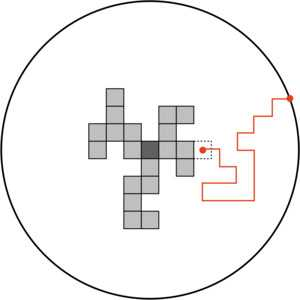


1.The extremely simple process seems to seize the essential ingredients of a great many natural phenomena. 

2.It produces clusters which look very much like real objects which are random and approximately self-similar. 

3.The simple process in the algorithm has resisted theoretical analysis.


#### Futher reading:

1. L. M. Sander, *Diffusion-limited aggregation: a kinetic critical phenomenon?*, Contemporary Physics, **41**, No. 4, pp. 203-218 (2000) [[pdf]](https://www.thp.uni-koeln.de/krug/teaching-Dateien/SS2012/Sander2000.pdf#page=2)
2. T. A. Witten, L. M. Sander, *Diffusion-limited aggregation*, Phys. Rev. B, **27**, No. 9, pp. 5686-5697 (1983) [[pdf]](https://pmc.polytechnique.fr/pagesperso/dg/cours/biblio/PRB%2027,%205686%20(1983)%20Witten,%20Sander%20%5BDiffusion-limited%20aggregation%5D.pdf)
3. T. A. Witten, *Fractal Growth: A Continuing Mystery*, Current Contents, No. 18, p. 8 (1993) [[pdf]](https://garfield.library.upenn.edu/classics1993/A1993KX31200001.pdf)

In [10]:

using SparseArrays
using Random
using Printf
using PyPlot

In [11]:

include("linear_regression.jl");

In [12]:

include("dla-utils.jl");

In [13]:

?grow_cluster!

search: grow_cluster! show_cluster



```
grow_cluster!(dish, basevecs, rads, m, animate, anistep)
```

Grow and optionally visualize a dendrite cluster. dish is the cluster storage, basevecs are the allowed directions of the diffusion steps, rads(m) is the vector of gyration radia of  the cluster, m is the number of molecules to add to the cluster, animate = (true|false) is the visualization switch: if animate is true, every 'anistep' of the growth process is shown.



### Cluster parameters

In [14]:

Random.seed!(111) # comment this line if reproducebility of the result is not needed

K = 312   # 'radius' of the dish
m = 10000 # size of the cluster

# Nearest neighbours on a square lattice
basevecs = ((0,1), (1,0), (0,-1), (-1,0))

animate = true
anistep = 20;

In [15]:
?dish_init

search: dish_init isfinite isxdigit isdigit isprint disable_sigint isdisjoint



```
dish, rads = dish_init(K, m)
```

K is the radius of the dish (in pixels), m is the number of molecules in the cluster, dish(2K+1, 2k+1) stores the growing cluster, rads(m) is the storage for gyration radia of the cluster.


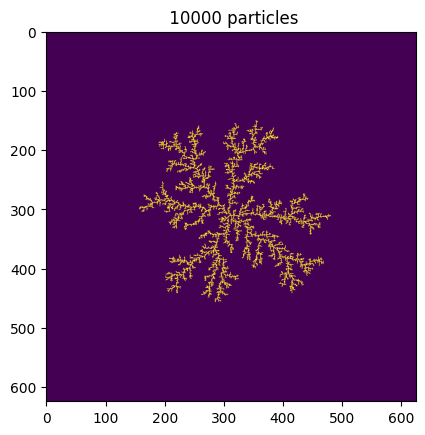

In [16]:

dish, rads = dish_init(K, m)
grow_cluster!(dish, basevecs, rads, m, animate, anistep);

In [17]:

?show_cluster

search: show_cluster grow_cluster! showable



```
show_cluster(dish)
```

Visualize the cluster `dish` obtained via the process of diffusion-limited aggregation. The coloring of the clusterr corresponds to the "age" of aggregation.


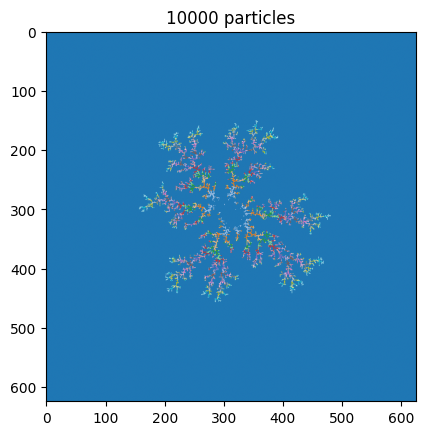

In [18]:

show_cluster(dish);


### Fractal dimension of DLA clusters

In [19]:

nmin = 1000   # skip the initial stage of the growth
M = nnz(dish) # The actual size of the cluster, can be different from requsted size m
nmols = nmin:M;


Visualize experimental data:

In [ ]:

loglog(rads[nmols], nmols, marker=".", markersize=0.5, linestyle="none", label="numerical experiment")

ax = gca()
ax.set_xscale("log", base=2)
ax.set_yscale("log", base=10)

grid(true)
title("Fractal dimension of dendrite agregates")
ylabel("number of molecules")
xlabel("radius of gyration")
legend();

In [ ]:

_, beta, _ = linear_regression(log.(rads[nmols]), log.(nmols));

In [ ]:

round(beta, sigdigits=3)

In [ ]:

loglog(rads[nmols], nmols, marker=".", markersize=0.5, linestyle="none", label="numerical experiment")
loglog(rads[nmols], 4*rads[nmols] .^ beta, label="fit "*L"n \sim r^{%$(round(beta, sigdigits=3))}", linestyle="dashed")

ax = gca()
ax.set_xscale("log", base=2)
ax.set_yscale("log", base=10)

grid(true)
title("Fractal dimension of dendrite agregates")
ylabel("number of molecules")
xlabel("radius of gyration")
legend();